In [147]:
import os

import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
try:
    from urllib.parse import urlparse
except ImportError:
     from urlparse import urlparse


In [143]:
%matplotlib inline 

In [144]:
def warmUpExercise():
    A = np.eye(5)
    return A
warmUpExercise()


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Linear regression with one variable

### read text dataset

In [4]:
data = np.loadtxt(os.path.join('ex1data1.txt'),delimiter = ',')
data.shape


(97, 2)

In [5]:
X,y = data[:,0], data[:,1]
m = data.shape[0]
n = data.shape[1]

### plot data

<Figure size 432x288 with 0 Axes>

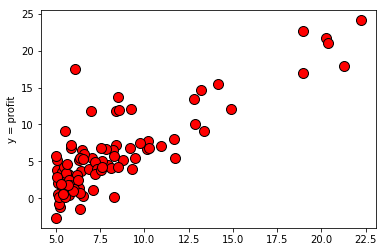

<Figure size 432x288 with 0 Axes>

In [6]:
def plotData(x,y):
    pyplot.plot(x,y, 'ro', ms=10, mec='k') # To set the markers to red circles, we used the option 'or' 
    pyplot.ylabel('y = profit')
    fig = pyplot.figure()
    return fig
plotData(X,y)

### gradient decent

In [7]:
# We store each example as a row in the the $X$ matrix in Python `numpy`. 
#To take into account the intercept term ($\theta_0$), 
#we add an additional first column to $X$ and set it to all ones.
#This allows us to treat $\theta_0$ as simply another 'feature'.

In [8]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).

Xold = X.copy()
X = np.stack([np.ones(m),X], axis = 1) # add along columns axis = 1
#X = np.concatenate([np.ones((m, 1)), X], axis=1)


In [9]:
X.shape

(97, 2)

In [10]:
Xold.shape

(97,)

#### computing the cost

In [11]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    h = np.dot(X,theta)
    J = np.sum((h-y)**2, axis = 0, keepdims = True)/(2*m)
    
    # ====================== YOUR CODE HERE =====================

    
    # ===========================================================
    return J

In [12]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07



In [13]:
# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


###### Convert a vector to matrix


In [14]:
y[None]
print(y.shape)
y[None,:].shape

(97,)


(1, 97)

In [15]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m,n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    n = X.shape[0]
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    #theta = theta.copy()
    
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        
        
        # ==================== YOUR CODE HERE =================================
        h = np.dot(X,theta)
        theta = theta - (np.dot(X.T,(h-y))) *alpha * 1/m
        # =====================================================================

        J_history[i] = computeCost(X, y, theta)
        # save the cost J in every iteration
        #J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [16]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


Text(0,0.5,'J(cost)')

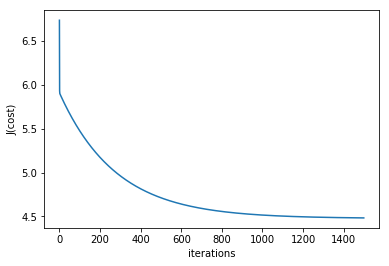

In [17]:
pyplot.plot(J_history)
pyplot.xlabel('iterations')
pyplot.ylabel('J(cost)')


Text(0,0.5,'profit')

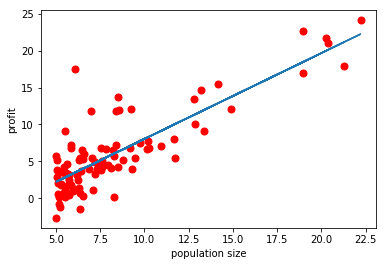

In [18]:
y = data[:,1]
pyplot.plot(X[:,1],y,'ro',ms=7)
y_pred = np.dot(theta,X.T)
pyplot.plot(X[:,1],y_pred)
pyplot.xlabel('population size')
pyplot.ylabel('profit')

In [19]:
# predict for population size of 80000
predict_80000 = np.dot(np.array([1,80000]),theta)
predict_80000


93305.35773540713

In [20]:
import seaborn as sns

In [21]:
from sklearn.linear_model import LinearRegression

### compare results with sklearn

In [22]:
reg_model = LinearRegression()
reg_model.fit(X[:,1].reshape(-1,1),y)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

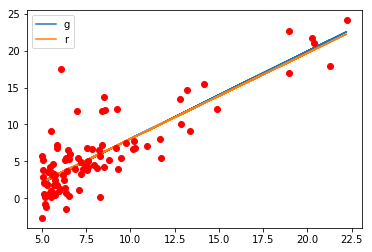

In [23]:
 
pyplot.plot(X[:,1],reg_model.intercept_+reg_model.coef_* X[:,1])
pyplot.legend('sklearn')
pyplot.plot(X[:,1],np.dot(theta,X.T))
pyplot.legend('gradiet descent')
pyplot.plot(X[:,1],y,'ro')


### visualizing

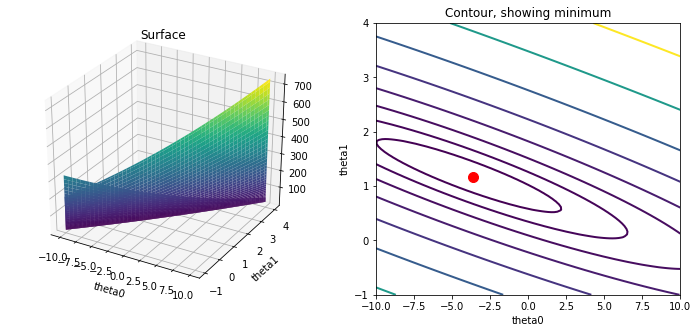

In [24]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass

# Linear regression with multiple variables

In [25]:
data = np.loadtxt(os.path.join('ex1data2.txt'),delimiter=',')
data.shape

(47, 3)

In [26]:
m = data.shape[0]
n = data.shape[1]

In [29]:
X = data[:,0:2]
y = data[:,-1]
print(X.shape)
print(y.shape)

(47, 2)
(47,)


In [30]:
# print out some data points
dicti = {'X[:,0]':X[:,0],'X[:,1]':X[:,1],'y':y}
statetment = '{}{}{}'
print('-'*26)
print(statetment.format(dicti['X[:,0]'],
                       dicti['X[:,1]'],
                       dicti['y']))
    
# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

--------------------------
[2104. 1600. 2400. 1416. 3000. 1985. 1534. 1427. 1380. 1494. 1940. 2000.
 1890. 4478. 1268. 2300. 1320. 1236. 2609. 3031. 1767. 1888. 1604. 1962.
 3890. 1100. 1458. 2526. 2200. 2637. 1839. 1000. 2040. 3137. 1811. 1437.
 1239. 2132. 4215. 2162. 1664. 2238. 2567. 1200.  852. 1852. 1203.][3. 3. 3. 2. 4. 4. 3. 3. 3. 3. 4. 3. 3. 5. 3. 4. 2. 3. 4. 4. 3. 2. 3. 4.
 3. 3. 3. 3. 3. 3. 2. 1. 4. 3. 4. 3. 3. 4. 4. 4. 2. 3. 4. 3. 2. 4. 3.][399900. 329900. 369000. 232000. 539900. 299900. 314900. 198999. 212000.
 242500. 239999. 347000. 329999. 699900. 259900. 449900. 299900. 199900.
 499998. 599000. 252900. 255000. 242900. 259900. 573900. 249900. 464500.
 469000. 475000. 299900. 349900. 169900. 314900. 579900. 285900. 249900.
 229900. 345000. 549000. 287000. 368500. 329900. 314000. 299000. 179900.
 299900. 239500.]
  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000

### normalization

In [31]:

def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0, keepdims = True)
    sigma = np.std(X, axis = 0, keepdims = True)
    X_norm = (X - mu) / sigma
    
    # ================================================================
    return X_norm, mu, sigma

Text(0.5,1,'before normalization')

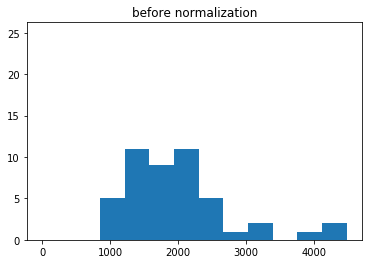

In [32]:
pyplot.hist(X[:,0])
pyplot.hist(X[:,1])
pyplot.title('before normalization')

In [33]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

('Computed mean:', array([[2000.68085106,    3.17021277]]))
('Computed standard deviation:', array([[7.86202619e+02, 7.52842809e-01]]))


In [34]:
# Add intercept term to X
#X2 = np.stack([np.ones(m),X_norm], axis = 1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


Text(0.5,1,'after the normalization')

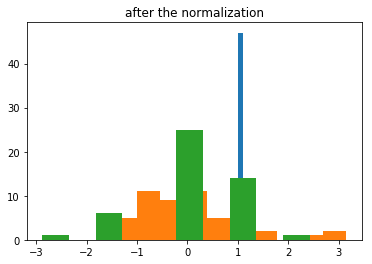

In [35]:
pyplot.hist(X[:,0])
pyplot.hist(X[:,1])
pyplot.hist(X[:,2])
pyplot.title('after the normalization')

### gradient descent

In [83]:
# initialize fitting parameters

theta_0 = np.zeros(3)

# some gradient descent settings
num_iters = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta_0, alpha, num_iters)

In [84]:
theta

array([340412.56301439, 109370.05670466,  -6500.61509507])

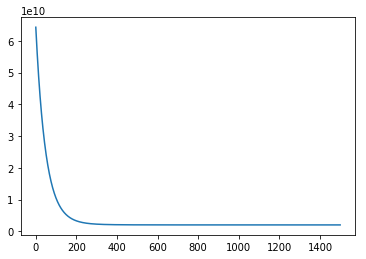

In [85]:
pyplot.plot(J_history)

### selecting learning rates

learning rate is: 0.01
learning rate is: 0.001
learning rate is: 0.0001


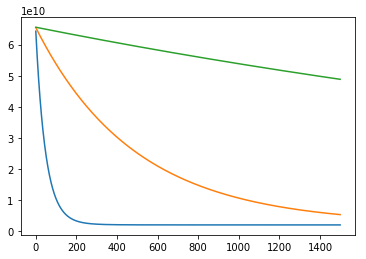

In [104]:
alpha = [0.01, 0.001, 0.0001]

for i in alpha:
    print ("learning rate is: " + str(i))
    theta,J = gradientDescent(X ,y, theta_0, i, num_iters)
    pyplot.plot(J)
    

# Normal Equations

In [106]:

# Load data
data = np.loadtxt(os.path.join('ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [129]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).T
    
    # =================================================================
    return theta

In [130]:
normalEqn(X, y)

array([89597.9095428 ,   139.21067402, -8738.01911233])